# Import Libraries

In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
pd.set_option('display.max_columns', None)

# Data Ingestion

In [3]:
#Loading the data from the s3 bucket into the notebook and creating a dataframe.
bucket='mlsb-batch7-group-b'
data_key='Flight_Price_Data_Train.xlsx'
data_location='s3://{}/{}'.format(bucket,data_key)
train_data=pd.read_excel(data_location)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EDA (Exploratory Data Analysis)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
print(train_data.shape)

(10683, 11)


In [6]:
train_data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data[train_data.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

* From the above cells we can see that the data contains records of 10683 customers with 11 features.

* We observe 2 missing values,I can directly drop these,as these are very less

* Dependent feature is Price and others are independent features

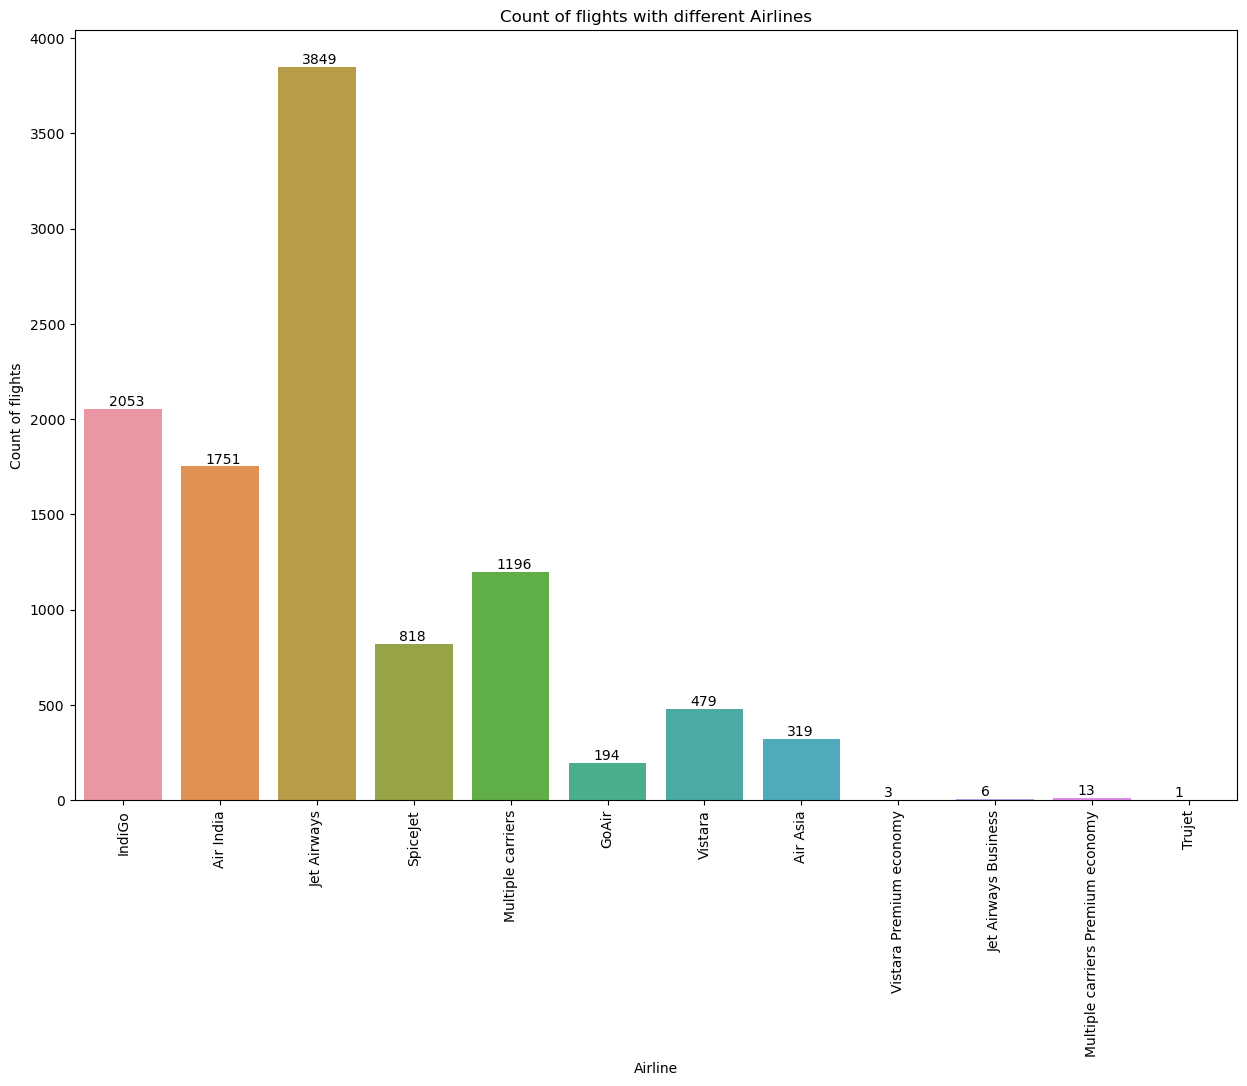

In [11]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sbn.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

* There are more number of flights of Jet Airways.

* Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

**Target Feature (Price) Analysis**

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.54881,1759.0,5277.0,8372.0,12373.0,79512.0


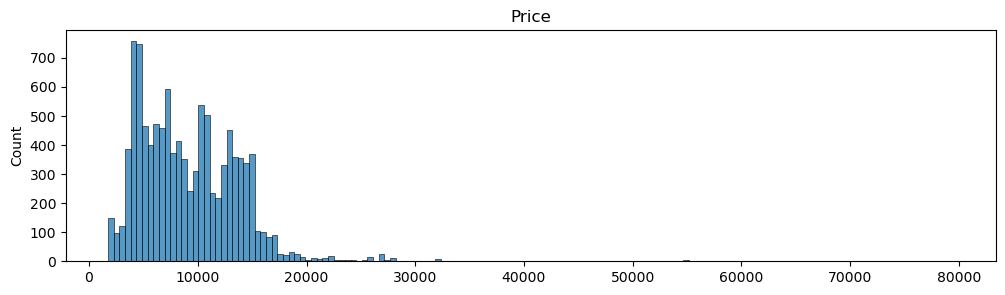

In [12]:
fig,axes=plt.subplots(figsize=(12, 3))
ax = sbn.histplot(train_data['Price'].values, bins=150).set_title('Price')
train_data[['Price']].describe().T

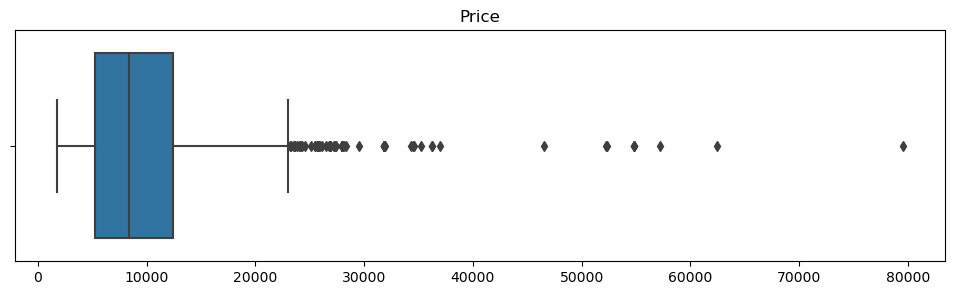

In [13]:
fig,axes=plt.subplots(figsize=(12, 3))
ax = sbn.boxplot(x=train_data['Price'].values).set_title('Price')

* From Histrogram and Boxplot, clearly there are **outliers heavily skewing flight price data.
* 2 Prices are right skewed by large outliers (20k to 80k price points).

**Transaction Count and Price (Airline Breakdown)**

In [14]:
airline_price_stats = train_data.groupby('Airline')['Price'].describe()
airline_price_stats.sort_values(by=['count'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
SpiceJet,818.0,4338.284841,1849.922514,1759.0,3574.5,3873.0,4760.00,23267.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.0,5162.0,6451.00,13774.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

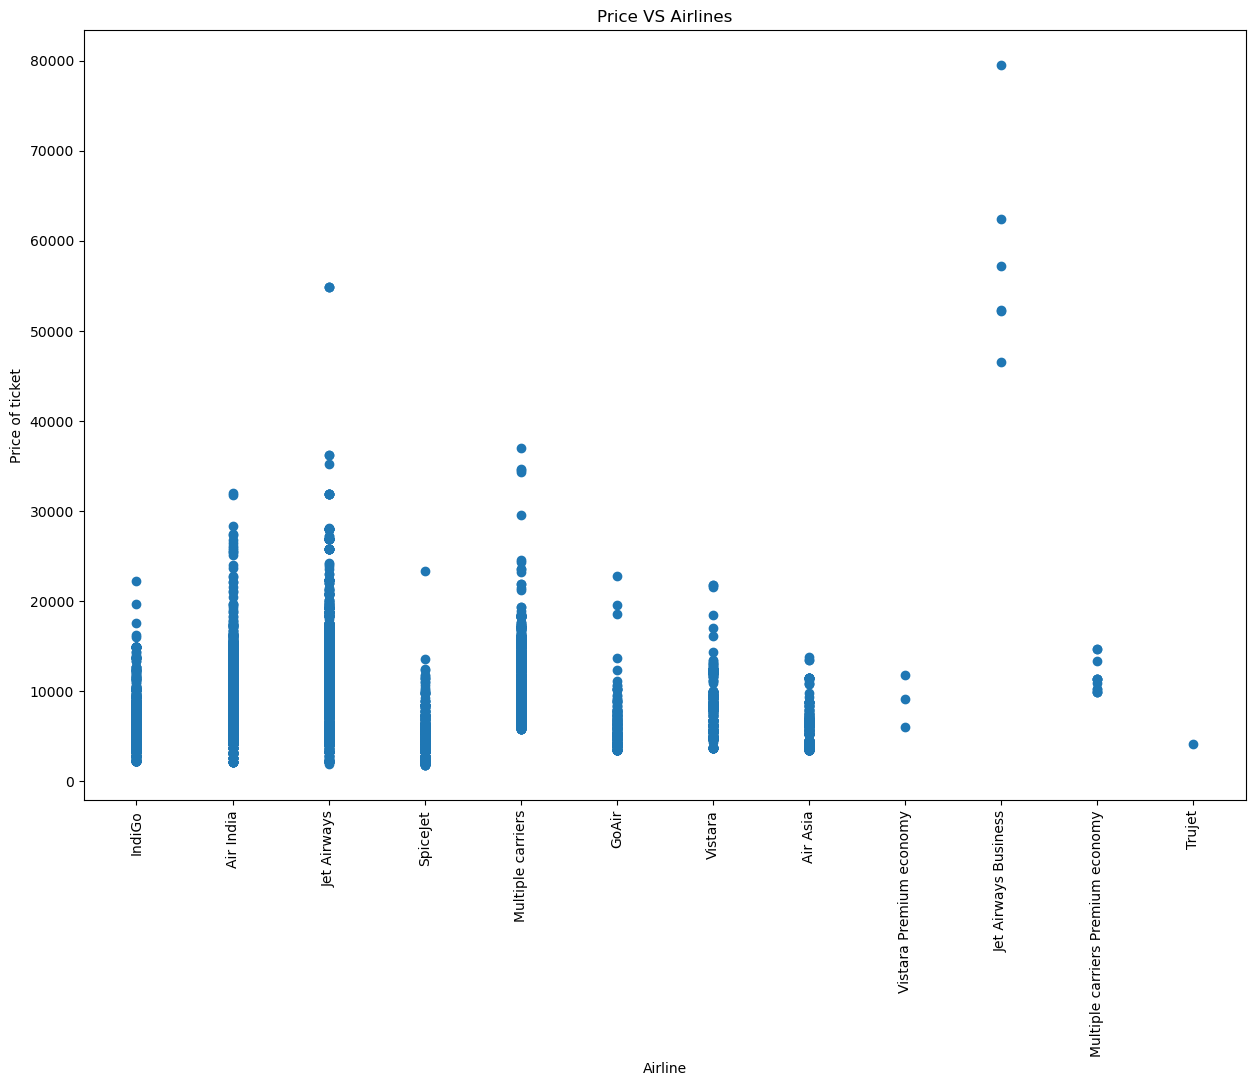

In [15]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

* The ticket rate for Jet Airways Business airline is high.

In [16]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


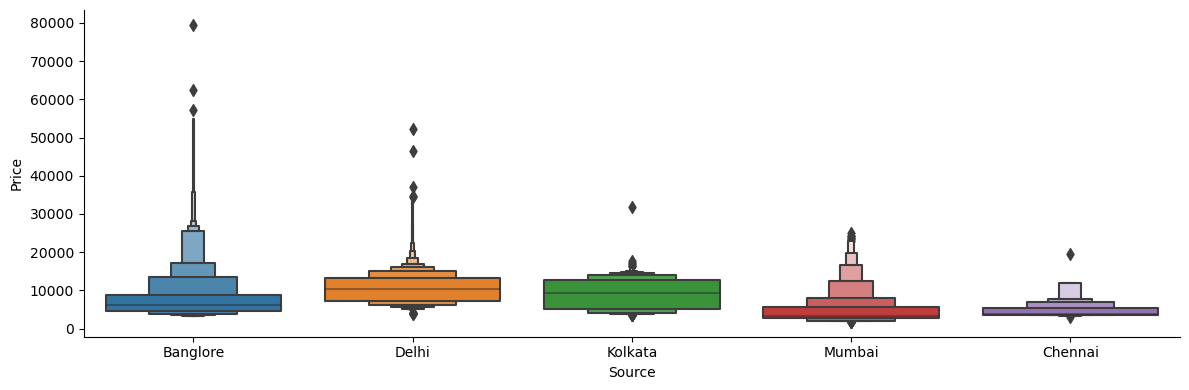

In [17]:
# Source vs Price

sbn.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

* We see that banglore source location has higher price

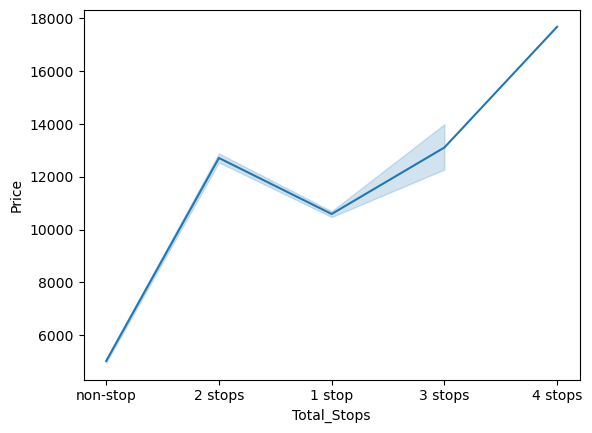

In [18]:
# Total_stops vs Price
sbn.lineplot(data=train_data, x='Total_Stops', y='Price')
plt.show()

* Clearly direct flights with 0 stops are significantly cheaper.
* We can also observe that the more number of stops, the more expensive the flight price is

**Price by "Additional Info" Breakdown**

In [20]:
train_data["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [21]:
airline_price_stats = train_data.groupby('Additional_Info')['Price'].describe()
airline_price_stats.sort_values(by=['count'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Additional_Info,,,,,,,,
No info,8344.0,9141.519295,4714.347572,1759.0,5224.0,8016.0,12970.00,54826.0
In-flight meal not included,1982.0,9471.834511,2812.043362,1840.0,7757.0,10262.0,10844.00,19644.0
No check-in baggage included,320.0,3645.156250,865.712619,1965.0,3543.0,3841.0,3859.00,6356.0
1 Long layover,19.0,22109.631579,8040.051155,7744.0,14673.0,25735.0,27992.00,31825.0
Change airports,7.0,16800.714286,4449.728371,13366.0,13940.5,15119.0,17573.50,26092.0
Business class,4.0,56811.250000,21381.667044,28097.0,49931.0,59818.0,66698.25,79512.0
No Info,3.0,8044.666667,119.181934,7917.0,7990.5,8064.0,8108.50,8153.0
1 Short layover,1.0,26743.000000,NaN,26743.0,26743.0,26743.0,26743.00,26743.0
2 Long layover,1.0,26480.000000,NaN,26480.0,26480.0,26480.0,26480.00,26480.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

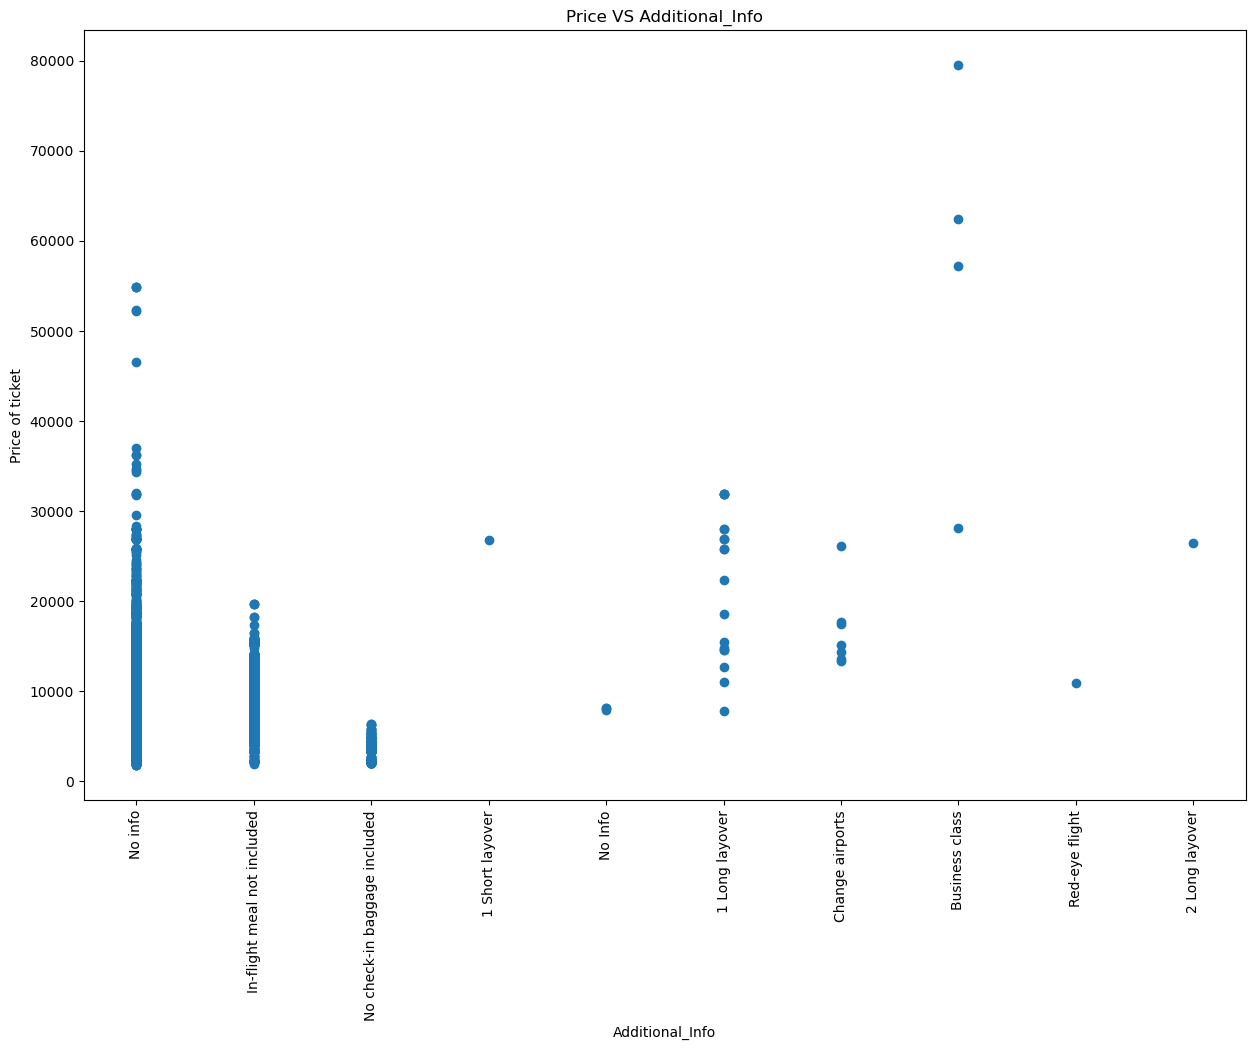

In [22]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional_Info')
plt.scatter(train_data['Additional_Info'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Additional_Info')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

* We can observe that flight prices are generally cheaper when there are no info

In [23]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Pre-Processing

**Extracting Day and Month from Day_of_Journey**

In [24]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day.astype('int')
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.month.astype('int')

# dropping "Date_of_Journey" column, since it has no use
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Extracting Hour and Minutes from Dep_Time

In [26]:
train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour.astype('int')
train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute.astype('int')

# dropping "Dep_Time" column, since it has no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

/tmp/ipykernel_21831/3882723796.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour.astype('int')
/tmp/ipykernel_21831/3882723796.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute.astype('int')


In [27]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Extracting Hour and Minutes from Arrival_Time

In [28]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour.astype('int')
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute.astype('int')

# dropping "Arrival_Time" column, since it has no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

/tmp/ipykernel_21831/2494281264.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour.astype('int')
/tmp/ipykernel_21831/2494281264.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute.astype('int')


In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Changing Duration feature from HH:MM to total minutes

In [30]:
hour_into_minute = pd.to_numeric(train_data['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[0])*60
mins = pd.to_numeric(train_data['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[1])

# some rows dont have mins. hence will become NaN if add hr and min columns tgt. 
train_data['Duration_min'] = np.where(mins.isnull(), hour_into_minute, hour_into_minute + mins )

In [31]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285.0


### Correlation between Duration & Price

<Axes: xlabel='Duration_min', ylabel='Price'>

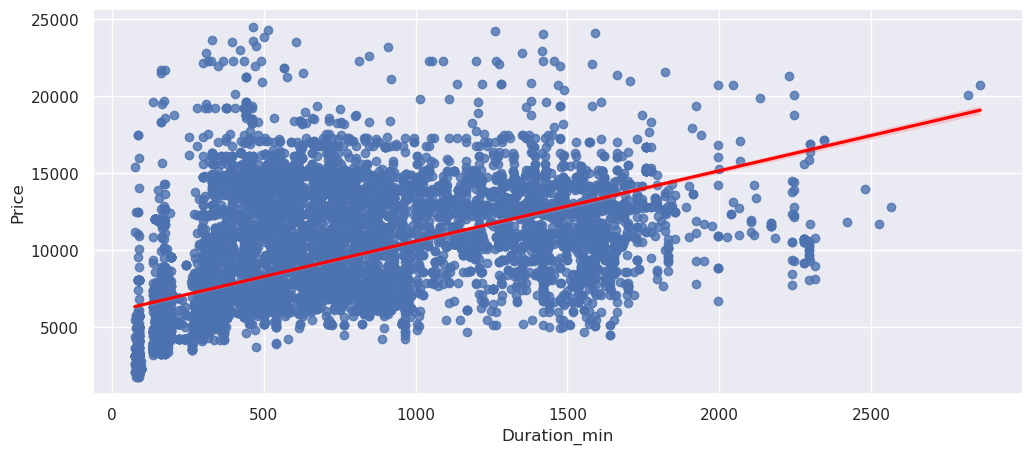

In [33]:
sbn.set(rc={'figure.figsize':(12,5)})
sbn.regplot(data=train_data[train_data['Price'] < 25000], x='Duration_min', y='Price',
            line_kws = {"color": "red"})

* We do see a slight positive correlation between flight duration and price.

### Changing categorical values to numerical values

In [34]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [35]:
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, dtype=int)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [37]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, dtype=int)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [38]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [39]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, dtype=int)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [40]:
train_data["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [41]:
Additional_Info = train_data[["Additional_Info"]]
Additional_Info = pd.get_dummies(Additional_Info, dtype=int)
Additional_Info.head()

,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [42]:
# Route and Total_Stops are related to each other

train_data.drop(["Route"], axis = 1, inplace = True)

In [43]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [44]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [45]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,285.0


In [46]:
data_trained = pd.concat([train_data, Airline, Source, Destination, Additional_Info], axis = 1)

In [47]:
data_trained.drop(["Airline", "Source", "Destination", "Additional_Info"], axis = 1, inplace = True)
data_trained.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,170.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,5,50,13,15,445.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,1140.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,6218,12,5,18,5,23,30,325.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,285.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [48]:
price_first_column = data_trained.pop('Price')
data_trained.insert(0, 'Price', price_first_column)

In [49]:
data_trained.head()

,Price,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,0,24,3,22,20,1,10,170.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,7662,2,1,5,5,50,13,15,445.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,13882,2,9,6,9,25,4,25,1140.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,6218,1,12,5,18,5,23,30,325.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,1,3,16,50,21,35,285.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


### correlation between Independent and dependent attributes

In [50]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,285.0


In [51]:
train_data.drop(["Airline", "Source", "Destination", "Additional_Info"], axis = 1, inplace = True)

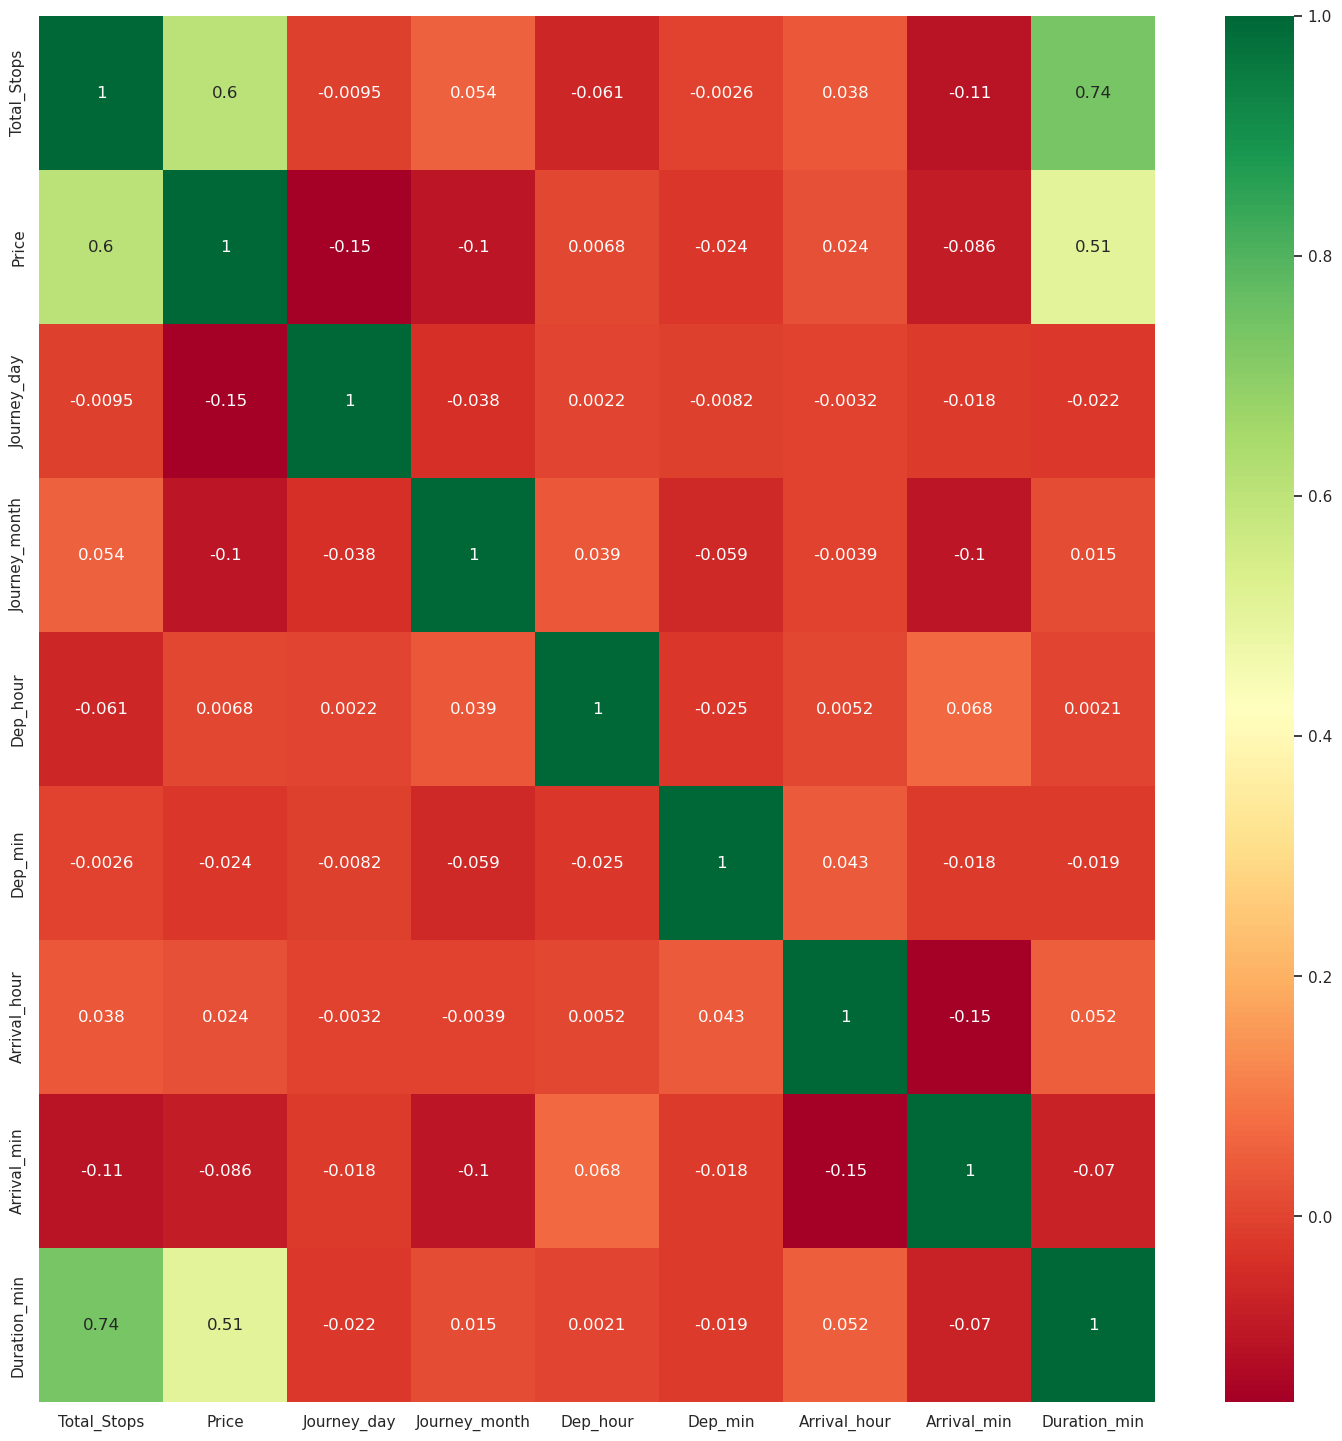

In [52]:
plt.figure(figsize = (18,18))
sbn.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# Training of model on local

In [53]:
data_trained = data_trained[data_trained['Price'].notnull()]

X = data_trained.drop(['Price'], axis=1)
y = data_trained['Price'].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = reg_rf.predict(X_test)

In [56]:
reg_rf.score(X_train, y_train)

0.9803363087844524

In [57]:
reg_rf.score(X_test, y_test)

0.9007739436361025

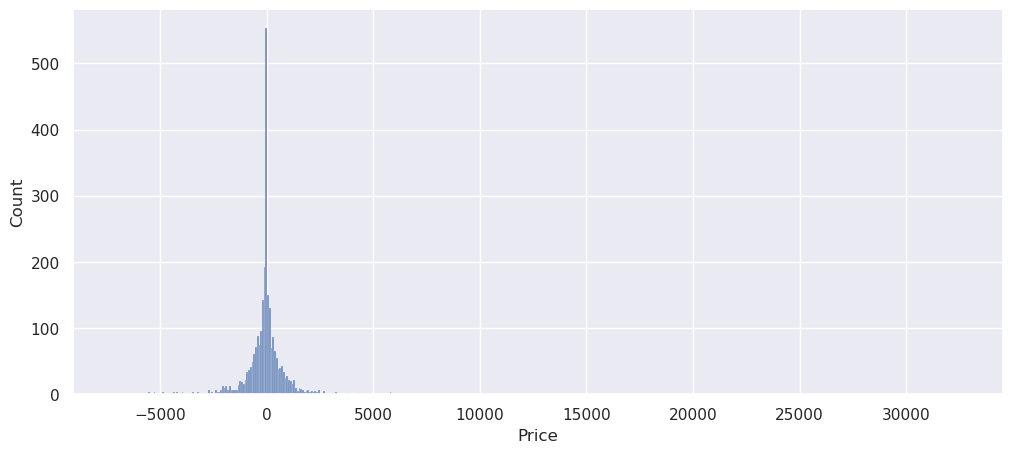

In [58]:
sbn.histplot(y_test-y_pred)
plt.show()

In [59]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.3 MB/s eta 0:00:00:00:0100:01


In [65]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred = reg_rf.predict(X_test)

In [67]:
xgb.score(X_train, y_train)

0.971122465264965

In [68]:
xgb.score(X_test, y_test)

0.9054187926757995

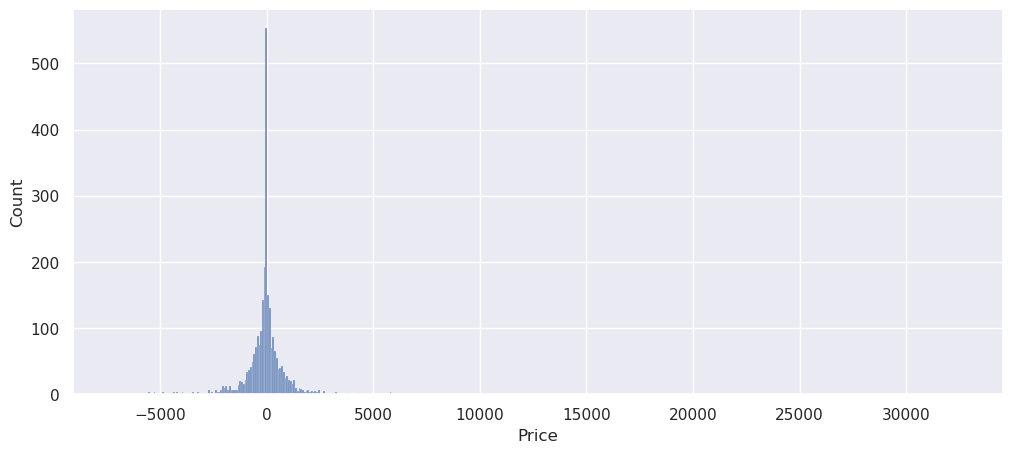

In [69]:
sbn.histplot(y_test-y_pred)
plt.show()

In [70]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
metrics.r2_score(y_test, y_pred)

MAE: 638.4939822030273
MSE: 2045349.321240241
RMSE: 1430.1570966996042


0.9007739436361025

In [71]:
! pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.2 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.1.0-py3-none-manylinux_2_26_x86_64.whl size=2428154 sha256=125bc7862c91b2c841b68d608cb25b00ba4ab4e4eb66703f665d93dc9764ba38
  Stored in directory: /home/ec2-user/.cache/pip/wheels/08/6f/90/45e64d89d9a147dc5a5ba6920fa24318210be01198c108d519
Successfully built lightgbm


In [72]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 8011, number of used features: 30
[LightGBM] [Info] Start training from score 9099.270878


LGBMRegressor()

In [73]:
y_pred = reg_rf.predict(X_test)

In [74]:
lgb.score(X_train, y_train)

0.9148306796319091

In [75]:
lgb.score(X_test, y_test)

0.8826475940390114

# Training of model on sagemaker

In [76]:
train_data,test_data = np.split(data_trained.sample(frac=1, random_state=42),[int(0.7 * len(data_trained))])
print(train_data.shape, test_data.shape)

(7477, 42) (3205, 42)


In [77]:
test_data.head()

,Price,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
5686,4823,0,1,6,20,0,22,50,170.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3965,4392,0,18,5,6,25,7,55,90.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4727,14571,1,9,6,8,25,19,50,685.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
973,6627,0,9,3,7,5,9,20,135.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1238,13377,1,3,6,11,30,1,30,840.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [78]:
#Specifying the output path for storing the model.
prefix ='xg-boost'
xgboost_output_path='s3://{}/{}/output'.format('mlsb-batch7-group-b', prefix)
print(xgboost_output_path)

prefix ='lightgbm'
lightgbm_output_path='s3://{}/{}/output'.format('mlsb-batch7-group-b', prefix)
print(lightgbm_output_path)

s3://mlsb-batch7-group-b/xg-boost/output
s3://mlsb-batch7-group-b/lightgbm/output


In [79]:
#Splitting the data into train and test set
#train_data,test_data = np.split(data_trained.sample(frac=1, random_state=1719),[int(0.7 * len(data_trained))])
#print(train_data.shape, test_data.shape)

(7477, 42) (3205, 42)


In [80]:
#Creating sagemaker session
import os
import sagemaker
from sagemaker.session import TrainingInput, Session
train_data.to_csv('train.csv', index=False, header=False)

In [81]:
#Uploading train.csv to the S3
boto3.Session().resource('s3').Bucket('mlsb-batch7-group-b').Object(os.path.join('train/train.csv')).upload_file('train.csv')

#Creating TrainingInput that our training function can use as a pointer to the files in S3 as we are using csv file format for training
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/train'.format('mlsb-batch7-group-b'), content_type='text/csv')

In [82]:
test_data.to_csv('test.csv', index=False, header=False)
boto3.Session().resource('s3').Bucket('mlsb-batch7-group-b').Object(os.path.join('test/test.csv')).upload_file('test.csv')
s3_input_test = sagemaker.TrainingInput(s3_data='s3://{}/test'.format('mlsb-batch7-group-b'), content_type='text/csv')

In [83]:
#Specifying the location of the xgboost algorithm containers.
from sagemaker import image_uris
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, "latest")

In [84]:
#Creating the estimator and training the model.

# initialize hyperparameters
hyperparameters = {
        "max_depth":"5",
        "eta":"0.06",
        "alpha":"0.8",
        "lambda_bias":"0.8",
        "gamma":"50",
        "min_child_weight":"6",
        "subsample":"0.7",
        "silent":0,
        "early_stopping_rounds":5,
        "objective":'reg:linear',
        "num_round":1000
        }

hyper_parameters = {
        "objective":'reg:linear',
        "num_round":1000
        }

xgboost = sagemaker.estimator.Estimator(
    container,
    hyperparameters=hyper_parameters,
    role=sagemaker.get_execution_role(),    
    instance_count=1,    
    instance_type='ml.m5.large',
    output_path=xgboost_output_path,
    sagemaker_session=sagemaker.Session(),
    epochs=30,
    num_models=32,
    use_spot_instance=True,)

NOTEBOOK_METADATA_FILE detected but failed to get valid domain and user from it.


In [85]:
xgboost.fit({'train': s3_input_train,'validation': s3_input_test})

INFO:sagemaker:Creating training-job with name: xgboost-2023-09-19-08-39-32-937


2023-09-19 08:39:33 Starting - Starting the training job...
2023-09-19 08:39:47 Starting - Preparing the instances for training......
2023-09-19 08:40:52 Downloading - Downloading input data...
2023-09-19 08:41:32 Training - Downloading the training image.....Arguments: train
[2023-09-19:08:42:17:INFO] Running standalone xgboost training.
[2023-09-19:08:42:17:INFO] File size need to be processed in the node: 0.97mb. Available memory size in the node: 340.02mb
[2023-09-19:08:42:17:INFO] Determined delimiter of CSV input is ','
[08:42:17] S3DistributionType set as FullyReplicated
[08:42:17] 7477x41 matrix with 306557 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-09-19:08:42:17:INFO] Determined delimiter of CSV input is ','
[08:42:17] S3DistributionType set as FullyReplicated
[08:42:17] 3205x41 matrix with 131405 entries loaded from /opt/ml/input/data/validation?format=csv&label_column=0&delimiter=,
[08:42:17] src/tree/updater_prune.cc:74: tree p

## Deploy the model

In [87]:
import sagemaker
from sagemaker.serializers import CSVSerializer


In [88]:
#deploying the model endpoint
xgboost_predictor = xgboost.deploy(initial_instance_count=1, instance_type="ml.t2.medium", serializer=CSVSerializer())


INFO:sagemaker:Creating model with name: xgboost-2023-09-19-08-47-21-291
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-09-19-08-47-21-291
INFO:sagemaker:Creating endpoint with name xgboost-2023-09-19-08-47-21-291


--------!

In [90]:
xgboost_predictor.serializer=CSVSerializer()
xgboost_predictor.content_type='text/csv'

In [91]:
test_data_array = test_data.drop(['Price'], axis=1).values
test_data_array
result=xgboost_predictor.predict(test_data_array)
result=result.decode("utf-8")
result_array=np.fromstring(result[1:], sep=',')

In [92]:
result_array.shape

(3205,)

In [95]:
result_array

array([  490.59179688, 11863.45507812, 13343.28613281, ...,
        4363.26660156,  7594.26416016,  3654.84619141])

In [96]:
finaldf = pd.DataFrame(result_array, columns=['predicted_price'])
final_output_df = pd.concat([test_data.reset_index(drop='True'),finaldf.reset_index(drop='True')],axis=1)
final_output_df.head()

,Price,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,predicted_price
0,8586,1,21,5,21,10,10,5,775.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,490.591797
1,11093,2,21,3,10,45,18,50,1925.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,11863.455078
2,13292,2,9,6,21,25,19,0,1295.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13343.286133
3,12898,1,27,5,17,30,12,35,1145.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12601.219727
4,7229,0,27,4,11,10,14,5,175.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7274.526855


In [97]:
y_test=test_data['Price']
y_test=np.array(y_test)
arr=[]
result=result_array[0:3205]
res = [float(i) for i in result]
for i in range(len(res)):
    arr.append(round(res[i]))
arr=np.array(arr)

In [98]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, arr))
print('MSE:', metrics.mean_squared_error(y_test, arr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, arr)))
metrics.r2_score(y_test, arr)

MAE: 713.1840873634945
MSE: 2067128.3366614664
RMSE: 1437.7511386402955


0.9087082411664629

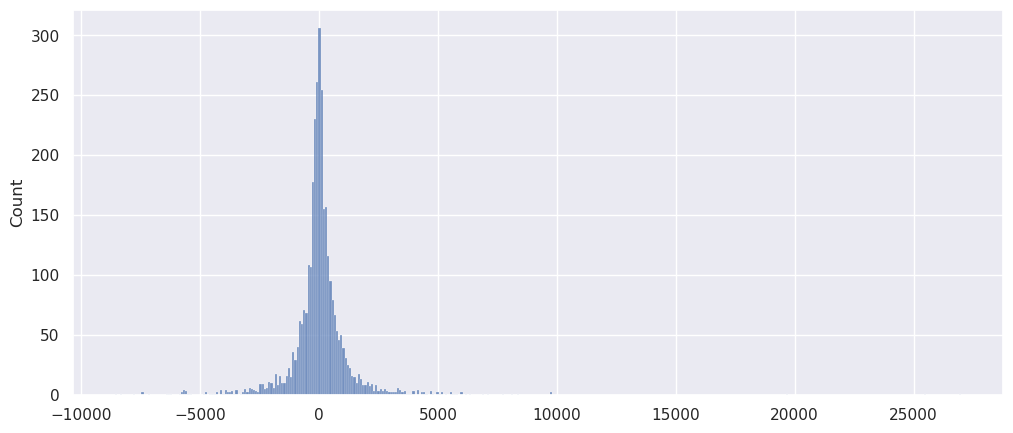

In [99]:
sbn.histplot(y_test-arr)
plt.show()

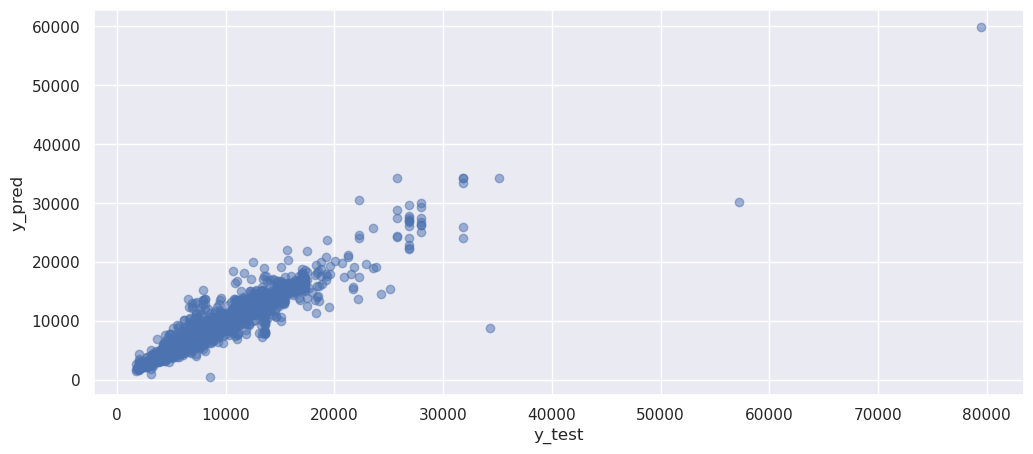

In [100]:
plt.scatter(y_test, arr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [101]:
xgboost_predictor.endpoint_name

'xgboost-2023-09-19-08-47-21-291'

In [ ]:
# sagemaker.Session().delete_endpoint(xgboost_predictor.endpoint)

## Testing of the Endpoint 

In [ ]:
import json
import boto3
email_client = boto3.client('sns')
runtime= boto3.client('runtime.sagemaker')
data = [
    {"key":"1,21,5,21,10,10,5,775.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0"},
    {"key":"2,21,3,10,45,18,50,1925.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0"},
       ]
# data = json.loads(json.dumps(event))
res=[]
for i in range(len(data)):
    customer_data = data[i]['key']
    print(customer_data)
    response = runtime.invoke_endpoint(EndpointName=xgboost_predictor.endpoint_name,
                                       ContentType='text/csv',
                                       Body=customer_data)                             
    result = json.loads(response['Body'].read().decode())
    res.append(result) 

print(res)